# [IAPR 2018:][iapr2018] Lab 1 ‒  Image segmentation

**Author:** Tao Sun  
**Due date:** 20.04.2018

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

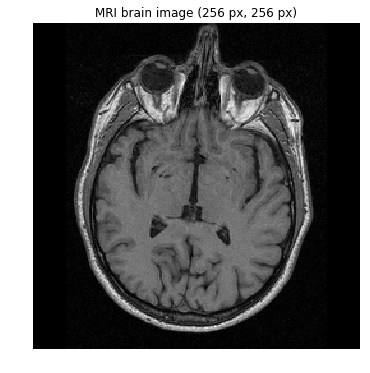

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing
Add your implementation and discussion

In [3]:
import numpy as np

In [4]:
def neighbor(image, seed):
    im_h, im_w = image.shape
    x, y = seed
    neighbor = []
    if(x>0):
        neighbor.append((x-1,y))
    if(y>0):
        neighbor.append((x,y-1))
    if(x<im_h-1):
        neighbor.append((x+1,y))    
    if(y<im_w-1):
        neighbor.append((x,y+1))    
    return neighbor

In [5]:
def region_growing(image, seed, t, region):
    ns = neighbor(image, seed)
    for n in ns:
        #print(seed, "neighbor:", n)
        if(region[n]==0): # not checked
            #print(seed, "check:", n)
            if(image[n]>=image[seed]):
                d = image[n] - image[seed]
            else:
                d = image[seed] - image[n]
            if(d < t):
                #print(seed, "put:", n, d)
                region[n] = 1 # mark as region
                region_growing(image, n, t, region) # check its region
            else:
                #print(seed, "not:", n, d)
                region[n] = -1 # mark as not region

In [10]:
region = brain_im.copy()
region.fill(0)
seed = (100,58)
region[seed] = 1
region_growing(brain_im, seed, 5, region)

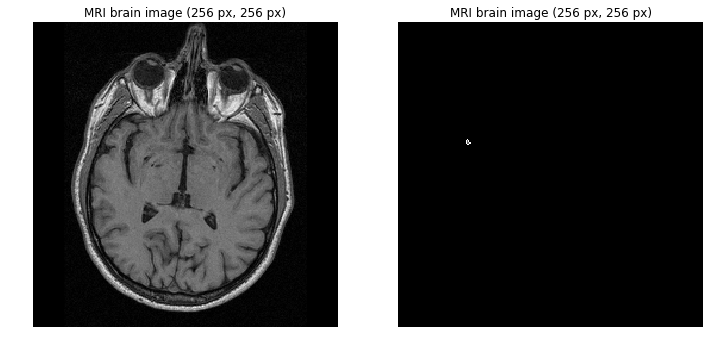

In [12]:
region[region==1] = 100
region[region==-1]=0
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(brain_im, cmap='gray')
ax[0].set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax[0].axis('off')
ax[1].imshow(region, cmap='gray')
ax[1].set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax[1].axis('off')
plt.show()

In [37]:
a[b]

array([12, 32, 32, 43])

### 1.3 Contour detection
Add your implementation and discussion

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter a picture of shapes of different colors, taken under four different illuminations.
We ask you to create a routine to:
1. Count the number of shapes of each color.
1. Compute the total area (in pixels) of each color.

One specific challenge is to be robust to illumination changes.
Try to have the same routine(s) running on the four images, and giving (approximatively) the same results.
Therefore some kind of intensity normalization should probably be used.
To help you, you will also find a reference image (palette) with disks of each possible color, that you can use as references.

**Note:** the routine(s) that you will write for this part will be useful for the robot project as well, so pay special attention to it.

### 2.1 Images and palette visualization

In [3]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03', 'arena-shapes-04']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  4
Image size: 480, 640 
Number of color channels:  3


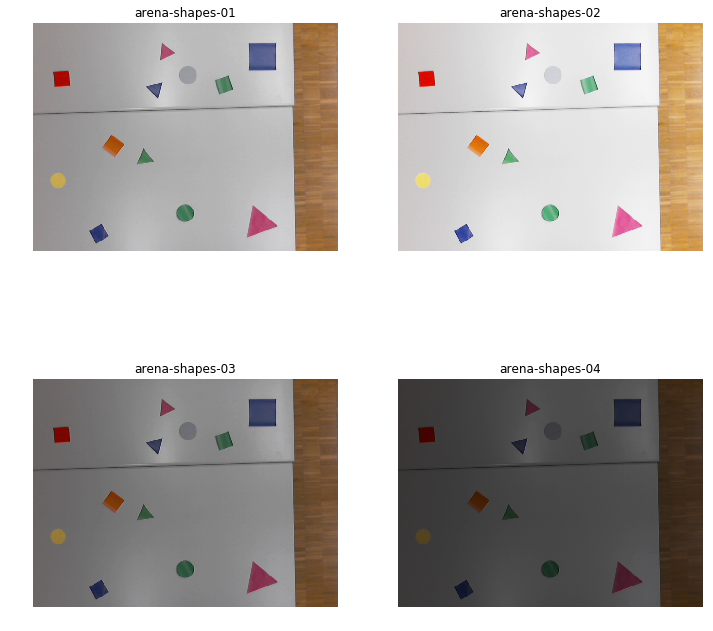

In [4]:
# Plot images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

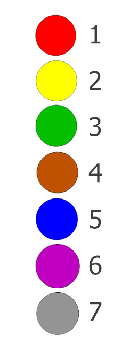

In [5]:
# Load and plot palette
palette = skimage.io.imread(os.path.join(data_path, 'arena-palette.png'))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(palette)
ax.axis('off')
plt.show()

### 2.2 Number of shapes of each color
Add your implementation and discussion

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion